In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
from energyquantified import EnergyQuantified
from energyquantified.metadata import ContractPeriod
from statsmodels.tsa.seasonal import seasonal_decompose

from historicl_movement_functions.ttf_download_hisotry import ttf_download_hisotry_func
from datetime import datetime

In [2]:
api_key = 'ebbdc4-a81661-5dfb18-e24b2e'
http_proxy  = "http://proxy.spp.sk:8080"
https_proxy  = "http://proxy.spp.sk:8080"

proxies = {"http"  : http_proxy,
            "https"  : https_proxy}

eq = EnergyQuantified(api_key=api_key, proxies= proxies)
eq.is_api_key_valid()

today = date.today()
ohlc = eq.ohlc.latest(
   'NL Futures Natural Gas EUR/MWh ICE-TTF OHLC',
   date=today
)

In [3]:
fwd_time_series = eq.ohlc.load(
   'NL Futures Natural Gas EUR/MWh ICE-TTF OHLC',
   begin=date(2010, 1, 1),
   end=date(2020, 1, 1),
   period=ContractPeriod.DAY  # Only monthly contracts
)

spot_prices = fwd_time_series.to_dataframe()
spot_prices = spot_prices.loc[spot_prices['front'] == 1].copy()

In [4]:
spot_prices

,traded,period,front,delivery,open,high,low,close,settlement,volume,open_interest
0,2017-11-06,day,1,2017-11-07,None,None,None,None,18.95,NaN,NaN
3,2017-11-07,day,1,2017-11-08,None,None,None,None,19.23,NaN,NaN
6,2017-11-08,day,1,2017-11-09,None,None,None,None,19.30,NaN,NaN
9,2017-11-09,day,1,2017-11-10,None,None,None,None,19.40,NaN,NaN
12,2017-11-10,day,1,2017-11-11,None,None,None,None,19.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1327,2019-12-24,day,1,2019-12-25,None,None,None,None,11.16,0.0,0.0
1330,2019-12-26,day,1,2019-12-27,None,None,None,None,11.16,0.0,0.0
1333,2019-12-27,day,1,2019-12-28,None,None,None,None,12.24,0.0,0.0
1336,2019-12-30,day,1,2019-12-31,None,None,None,None,12.25,0.0,0.0


In [5]:
forward_prices = ohlc.to_dataframe()
forward_prices


,traded,period,front,delivery,open,high,low,close,settlement,volume,open_interest
0,2025-10-07,day,1,2025-10-08,NaN,NaN,NaN,NaN,33.66,0.0,515.0
1,2025-10-07,day,2,2025-10-09,NaN,NaN,NaN,NaN,33.47,0.0,515.0
2,2025-10-07,day,3,2025-10-10,NaN,NaN,NaN,NaN,33.47,0.0,515.0
3,2025-10-07,month,1,2025-11-01,32.89,33.63,32.89,33.38,33.25,114883.0,199823.0
4,2025-10-07,month,2,2025-12-01,33.02,33.84,33.02,33.61,33.47,44485.0,170110.0
...,...,...,...,...,...,...,...,...,...,...,...
94,2025-10-07,year,4,2029-01-01,24.63,24.63,24.63,24.63,24.64,5.0,NaN
95,2025-10-07,year,5,2030-01-01,24.15,24.15,24.08,24.08,24.09,55.0,NaN
96,2025-10-07,year,6,2031-01-01,24.00,24.00,23.93,23.93,23.94,60.0,NaN
97,2025-10-07,year,7,2032-01-01,NaN,NaN,NaN,NaN,24.40,0.0,NaN


In [6]:
forward_prices = forward_prices.loc[forward_prices['period'].eq('month')].copy()

# 2) ensure delivery is datetime
forward_prices['delivery'] = pd.to_datetime(forward_prices['delivery'], errors='coerce')

# 3) add year and month columns
forward_prices['year'] = forward_prices['delivery'].dt.year
forward_prices['month'] = forward_prices['delivery'].dt.month_name()   # use .dt.month_name() for names instead or dt.month 
forward_prices

,traded,period,front,delivery,open,high,low,close,settlement,volume,open_interest,year,month
3,2025-10-07,month,1,2025-11-01,32.89,33.63,32.89,33.38,33.25,114883.0,199823.0,2025,November
4,2025-10-07,month,2,2025-12-01,33.02,33.84,33.02,33.61,33.47,44485.0,170110.0,2025,December
5,2025-10-07,month,3,2026-01-01,33.55,33.98,33.38,33.76,33.65,32660.0,150843.0,2026,January
6,2025-10-07,month,4,2026-02-01,33.59,33.95,33.37,33.71,33.59,20046.0,141036.0,2026,February
7,2025-10-07,month,5,2026-03-01,33.39,33.45,32.87,33.17,33.09,20817.0,159694.0,2026,March
8,2025-10-07,month,6,2026-04-01,32.07,32.09,31.55,31.89,31.77,16726.0,101223.0,2026,April
9,2025-10-07,month,7,2026-05-01,31.56,31.56,31.05,31.37,31.27,13906.0,89569.0,2026,May
10,2025-10-07,month,8,2026-06-01,31.48,31.48,31.08,31.30,31.20,14056.0,72744.0,2026,June
11,2025-10-07,month,9,2026-07-01,31.26,31.38,31.13,31.30,31.25,9762.0,70579.0,2026,July
12,2025-10-07,month,10,2026-08-01,31.57,31.57,31.22,31.40,31.34,9997.0,79002.0,2026,August


In [7]:
today = pd.Timestamp.today().normalize()
cutoff_year = today.year if today.month <= 4 else today.year + 2
cutoff = pd.Timestamp(cutoff_year, 4, 30)

forward_prices = (
    forward_prices
      .loc[forward_prices['period'].eq('month') & (forward_prices['delivery'] <= cutoff)]
      .sort_values('delivery')['settlement']
      .to_numpy(dtype=float)
)


In [8]:
forward_prices

array([33.25, 33.47, 33.65, 33.59, 33.09, 31.77, 31.27, 31.2 , 31.25,
       31.34, 31.53, 31.72, 32.4 , 32.8 , 32.95, 32.81, 31.97, 29.25])

In [9]:
min_inventory = 0       # minimum inventory (e.g. 0 units)
max_inventory = 500000   # maximum inventory (e.g. 1000 units)

start_inventory = 400000   # starting inventory level (e.g. 500 units)

injection_percentage_ratchet = [0, 30, 80, 100]
injection_volume_ratchet = [6370, 5096, 3822, 0]

withdraw_percentage_ratchet = [0, 25, 100]
withdraw_volume_ratchet = [4430, 8860, 8860]



In [10]:
from monte_carlo_storage_lsmc import monte_carlo_storage_lsmc_func

min_inv = 0
max_inv = 500000
start_inv = 400000
inj_pct = [0, 30, 80, 100]
inj_vol = [6370, 5096, 3822, 0]
wd_pct  = [0, 25, 100]
wd_vol  = [4430, 8860, 8860]

value0, schedule_df, dates, policy = monte_carlo_storage_lsmc_func(
    forward_prices, monthly_profile,
    min_inv, max_inv, start_inv,
    inj_pct, inj_vol, wd_pct, wd_vol,
    n_sims=5000, daily_volatility=0.5, kappa=3.0, inj_var_cost=0.05, wd_var_cost=0.03, r_annual=0.02, seed=42
)

print("LSMC expected Full Value (E+I):", round(value0, 2))
print(schedule_df.head())

NameError: name 'monthly_profile' is not defined

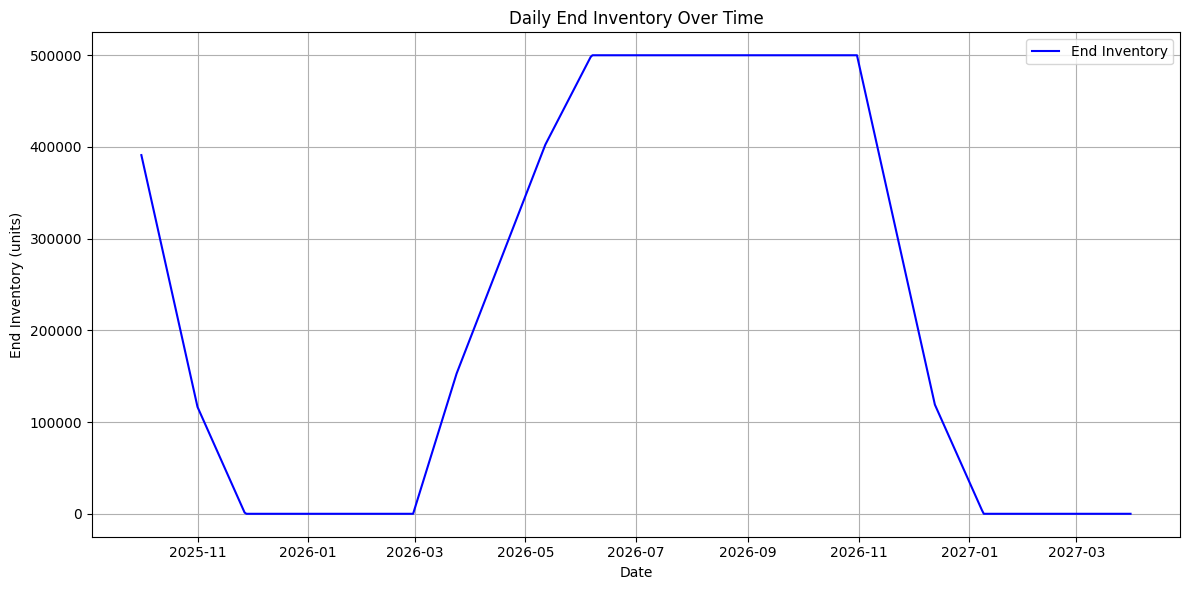

In [15]:

plt.figure(figsize=(12,6))
plt.plot(schedule_df["Date"], schedule_df["End Inventory"], label="End Inventory", color="blue")
plt.xlabel("Date")
plt.ylabel("End Inventory (units)")
plt.title("Daily End Inventory Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()